# [ES-21AC] State Prisons and County Jails 

---
### Professor: Victoria Robinson 
### Data Science Fellow: Phillip Pierini

The goal of this project is for students to understand that they can do social work using data. This notebook explores the incarceration trends and impacts of prison realignment in California. 

*Estimated Time: 50 minutes*

---

### Table of Contents

[THE DATA](#sectiondata)<br>


[CONTEXT](#sectioncontext)<br>


[JAILS](#section1)<br>

1. [DATA](#subsection1)<br>
2. [DATA ANALYSIS](#subsection2)<br>
3. [GENERAL:SENTENCED & UNSENTENCED](#subsection3)<br>
4. [GENDER DIVISION](#subsection4)<br>

[Final Survey](#section2)<br>

---

**Please run the cell below before you begin.**

**Dependencies:**

In [3]:
from datascience import *
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import ipywidgets as widgets
%run Data_Cleaning_and_Helper_Functions.ipynb

--- 

## THE DATA <a id='sectiondata'></a>

In this notebook, you will use data from the Jail Profile Survey provided by the Board of State and Community Corrections (BSCC). 


The Jail Profile Survey releases reports on data recorded by local agencies. Some of the valuable information that will find here include the total number of unsentenced and sentenced males and females in each of these facilities. This data has been used to determine the needs of each of these counties when determining the distribution state bond monies, and future projections for other jail needs. 

If you are interested in learning more please visit:

[Jail Profile Survey](http://www.bscc.ca.gov/downloads/JPSWorkbook.pdf) 

[Jail Profile Survey data](https://app.bscc.ca.gov/joq//jps/QuerySelection.asp)



---
## CONTEXT  <a id='sectioncontext'></a>
---

During the course, we have learned about the policies of realignment, incarceration, and crime trends in California. By exploring these datasets we hope to get a clear picture of the magnitude of prison and county jail overcrowding per facility and region, and the effects of realignment policies in state prisons and county jails.



The key difference between state prisons and jails involve the process of sentencing. Prisons are designed for long term sentences, while jails are for those who are unsentenced or have short term sentences. (Short-term sentences are generally one year or less.) Prisons are larger and controlled at the state level. In contrast, jails are smaller and handled by a city or county.



The relationship between the two institutions is emphasized by mass incarceration. Through this activity, we will analyze how overcrowding within California’s state prisons influenced the size of jail populations after realignment policies were implemented.


---
# JAILS <a id='section1'></a>
---


# Add note about the jails 

## 0. DATA<a id='subsection1'></a>
---

### 0.1  Data Dictionary 

Below you will find a data dictionary for future reference.

### 0.2 Importing the Data
Let's start off by importing our jails data into our Jupyter Notebook so we can use and analyze the jails data. To do this, we can use the `datascience` package and the `read_table()` function. This function takes in the name of our CSV file (which in our case is "jails_cleaned.csv" and then it reads the file for us so we can use it here.

In [5]:
jail = Table().read_table("jails_cleaned.csv")

In [7]:
jail.show(5)

Unnamed: 0,Jurisdiction,Facility,Year,Month,Unsentenced males,Unsentenced females,Sentenced males,Sentenced females,Total facility ADP
0,Alameda Sheriff's Dept.,Glen Dyer Jail,1995,10,539,1,143,0,683
1,Alameda Sheriff's Dept.,Santa Rita Jail,1995,10,1983,197,887,166,3233
2,Amador Sheriff's Dept.,Amador County Jail,1995,10,15.33,1.59,21.7,4.85,43.47
3,Butte Sheriff's Dept.,Butte County Jail,1995,10,225,39,158,15,437
4,Calaveras Sheriff's Dept.,Calaveras County Jail,1995,10,20.8,0.4,29.6,3.9,54.7


We have now imported our data! For the purposes of our analysis that we will do, we only want to keep the following columns: Year, Unsentenced males, Unsentenced females, Sentenced males, and Sentenced females. To do this we can use the `select()` function.

In [10]:
data_year = jail.select("Year", "Unsentenced males", "Unsentenced females", "Sentenced males", "Sentenced females", "Total facility ADP")
data_year.show(5)

Year,Unsentenced males,Unsentenced females,Sentenced males,Sentenced females,Total facility ADP
1995,539,1,143,0,683
1995,1983,197,887,166,3233
1995,15.33,1.59,21.7,4.85,43.47
1995,225,39,158,15,437
1995,20.8,0.4,29.6,3.9,54.7


Much of the analysis that we will be doing involves looking at the total unsentenced/sentenced males/females per **year**. 

Right now our data is separated by each particular jail (and each jail has a row for every year). Therefore, we need to aggregate our data: we want to group by the Year and find the sum of the Unsentenced males, Unsentenced females, Sentenced males, and Sentenced females.

To accomplish this, we can use the `group()` function with the `collect=` parameter based on how we want to aggregate/combine the data.

In [9]:
data_year = data_year.group("Year", sum)
data_year.show(5)

Year,Unsentenced males sum,Unsentenced females sum,Sentenced males sum,Sentenced females sum,Total facility ADP sum
1995,111311,13430.4,73436.1,11201.6,209225
1996,444830,55555.7,300297,44444.9,845128
1997,461675,64381.5,326194,52028.7,904279
1998,469013,66372.2,337045,58904.8,931335
1999,463570,63054.8,316691,54883.7,898199


---
## 1. DATA ANALYSIS<a id='subsection2'></a>
---

To analyze the data, we are going to create various visualizations! Often times it is more useful to visually inspect the information as it might reveal useful insights and provide a context to the data we are looking at. First we will take a look at the total facility ADP over the years.

Remember, the format for plotting is: 
* **To draw plot**:
*data_table*.`plot(`*x_variable*, *y_variable*`)`. Where the x and y varibles stand for the name of the columns in our data table
* **To label plot**: We use `plt.xlabel`(*x_axis name*), `plt.ylabel`(*y_axis name*), `plot.title`(*plot_title*)

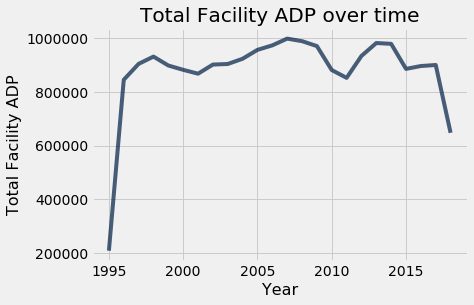

In [9]:
# total facility ADP over time
data_year.plot("Year", "Total facility ADP sum")
plt.xlabel("Year")
plt.ylabel("Total Facility ADP")
plt.title("Total Facility ADP over time")

Due to realignment, the years of 2011, 2013, and 2014 were significant. Let's see how these specific years play out on our plot above by plotting red dots representing those years.

First, let's start off by getting the data at the years 2011, 2013, and 2014. To do this we can use the `where()` function and specify the column we are looking at and the specific value we want that column to be (in order to get the rest of the data).

In [10]:
data2011 = data_year.where("Year", 2011)
data2013 = data_year.where("Year", 2013)
data2014 = data_year.where("Year", 2014)

Next, we want to get the x and y coordinates of each point using the data we just found. For example, using data2011, can now assign x_2011 to the year column and the y_2011 to the Total facility ADP sum column.

In [11]:
x_2011 = data2011.column('Year')
y_2011 = data2011.column("Total facility ADP sum")

x_2013 = data2013.column('Year')
y_2013 = data2013.column("Total facility ADP sum")

x_2014 = data2014.column('Year')
y_2014 = data2014.column("Total facility ADP sum")

We can now add our points to our plot.

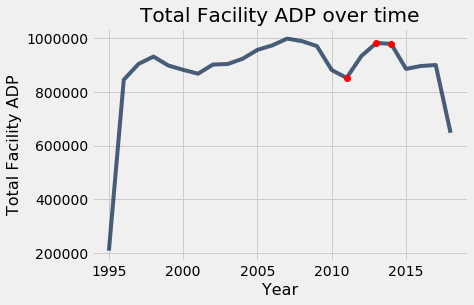

In [12]:
data_year.plot("Year", "Total facility ADP sum")
plt.xlabel("Year")
plt.ylabel("Total Facility ADP")
plt.title("Total Facility ADP over time")

plt.plot(x_2011, y_2011, 'ro')
plt.plot(x_2013, y_2013, 'ro')
plt.plot(x_2014, y_2014, 'ro')

What do you notice about the years we just plotted? Based on what you know about realignment and jails, can the position of these points be explained?

YOUR RESPONSE HERE

## 2. GENERAL: DESIGNED & STAFFED CAPACITY<a id='subsection3'></a>

Now, let us go ahead and compare the sentenced and unsentenced population for county jails (over all the years since 1995). We will be creating and looking at the following comparisons:
- overall (male and female) sentenced and (male and female) unsentenced
- male unsentenced vs male sentenced
- female unsentenced vs female sentenced

### 2.1 General: Sentenced vs. Unsentenced

Our first step is to get the total number of sentenced people and total number of unsentenced people per year. Right now we have both of these split by male and female. We are going to have to get the male unsentenced value per year and add it with the female unsentenced value per year (and same for the male sentenced and female unsentenced values per year). 

In [13]:
# overall (male and female) sentenced and (male and female) unsentenced
# first let's get the male/female unsentenced/sentenced
m_sent = data_year.column("Sentenced males sum")
f_sent = data_year.column("Sentenced females sum")
m_unsent = data_year.column("Unsentenced males sum")
f_unsent = data_year.column("Unsentenced females sum")

Using what we just found, let's combine the values into all sentenced and all unsentenced in order to get the total sentence and the total unsentenced per year.

In [14]:
sentenced_all = m_sent + f_sent
unsentenced_all = m_unsent + f_unsent

We can go ahead and add this to our original data table (called `data_year` in order to keep track of the data we are calculating).

In [15]:
data_year = data_year.with_column("Total Sentenced", sentenced_all)
data_year = data_year.with_column("Total Unsentenced", unsentenced_all)

Let's then select the relevant columns that we need, which are the year column, the total sentenced column, and the total unsentenced column.

In [16]:
totals = data_year.select("Year", "Total Sentenced", "Total Unsentenced")
totals

Year,Total Sentenced,Total Unsentenced
1995,84637.7,124742
1996,344742,500385
1997,378223,526056
1998,395950,535386
1999,371575,526624
2000,349725,532386
2001,332837,534873
2002,336609,565078
2003,313897,589913
2004,314397,608908


Similar to how we plotted the Total ADP over Time above, let's now plot the total number of people sentenced versus the total number of people unsentenced.

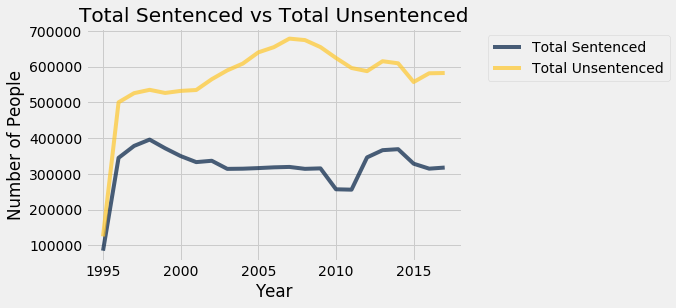

In [17]:
totals.plot("Year")
plt.title("Total Sentenced vs Total Unsentenced")
plt.xlabel("Year")
plt.ylabel("Number of People")

Do you notice anything interesting about this visualization we just plotted?

YOUR RESPONSE HERE

Above, we found the literal numbers of people who were sentenced and unsentenced per year. Let's use the same data and numbers except find and plot the **percentages** of the total sentenced and unsentenced. To do this, we can get our "total" using the column "Total facility ADP sum" and then divide the total sentenced and total unsentenced by this value. 

In [18]:
total_adp = data_year.column("Total facility ADP sum")

sent_percent = sentenced_all / total_adp * 100
unsent_percent = unsentenced_all / total_adp * 100

We have our percentages now so let's repeat the same process as above where we add it to our `data_year` table and select the relevant columns that we want.

In [19]:
data_year = data_year.with_column("Total Sentenced Percent", sent_percent)
data_year = data_year.with_column("Total Unsentenced Percent", unsent_percent)

percent_totals = data_year.select("Year", "Total Sentenced Percent", "Total Unsentenced Percent")
percent_totals

Year,Total Sentenced Percent,Total Unsentenced Percent
1995,40.4529,59.6207
1996,40.7917,59.2083
1997,41.8259,58.1741
1998,42.5142,57.4858
1999,41.3689,58.6311
2000,39.6463,60.3537
2001,38.3581,61.642
2002,37.3311,62.669
2003,34.7304,65.2696
2004,34.0513,65.9487


Now let's plot this data using our same line plot method as before!

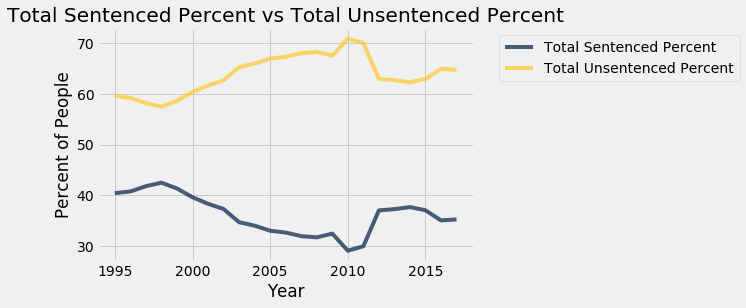

In [20]:
percent_totals.plot("Year")
plt.title("Total Sentenced Percent vs Total Unsentenced Percent")
plt.xlabel("Year")
plt.ylabel("Percent of People")

Similar to above, let's try plotting dots so we can see what happened at specific years in the jails. Due to realignment, the years of 2011, 2013, and 2014 were significant. Let's see how these specific years play out on our plot above by plotting red dots representing those years.

First, let's start off by getting the data at the years 2011, 2013, and 2014. To do this we can use the `where()` function and specify the column we are looking at and the specific value we want that column to be (in order to get the rest of the data).

In [21]:
data2011 = percent_totals.where("Year", 2011)
data2013 = percent_totals.where("Year", 2013)
data2014 = percent_totals.where("Year", 2014)

Next, we want to get the x and y coordinates of each point using the data we just found. For example, using data2011, can now assign x_2011 to the year column and the y_2011 to the Percent column.

In [22]:
x_2011 = data2011.column('Year')
y_2011 = data2011.column("Total Sentenced Percent")

x_2013 = data2013.column('Year')
y_2013 = data2013.column("Total Sentenced Percent")

x_2014 = data2014.column('Year')
y_2014 = data2014.column("Total Sentenced Percent")

x_2011_un = data2011.column('Year')
y_2011_un = data2011.column("Total Unsentenced Percent")

x_2013_un = data2013.column('Year')
y_2013_un = data2013.column("Total Unsentenced Percent")

x_2014_un = data2014.column('Year')
y_2014_un = data2014.column("Total Unsentenced Percent")

We can now add our points to our plot.


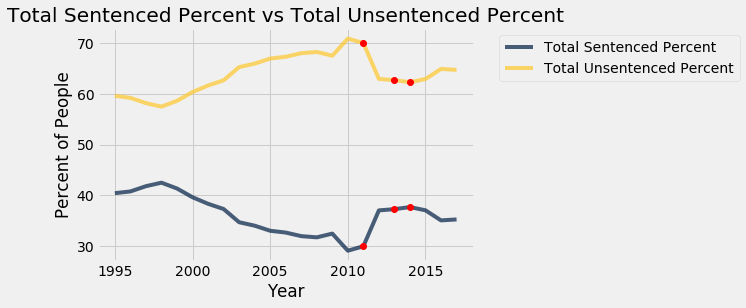

In [23]:
percent_totals.plot("Year")
plt.title("Total Sentenced Percent vs Total Unsentenced Percent")
plt.xlabel("Year")
plt.ylabel("Percent of People")

plt.plot(x_2011, y_2011, 'ro')
plt.plot(x_2013, y_2013, 'ro')
plt.plot(x_2014, y_2014, 'ro')
plt.plot(x_2011_un, y_2011_un, 'ro')
plt.plot(x_2013_un, y_2013_un, 'ro')
plt.plot(x_2014_un, y_2014_un, 'ro')

Is there anything interesting that you see related to the percentages and years? How does looking at percentages and numbers compare?

YOUR RESPONSE HERE

## 3. GENDER DIVISION <a id='subsection4'></a>
---

### 3.1 Males: Sentenced vs. Unsentenced

We just looked at the total number of people who were sentenced and the total number of people who were unsentenced, per year. Next let's look at just the number of males who were sentenced vs the number of males who were unsentenced. Let's start by select the relevant columns that we are going to use for our analysis.

In [24]:
males = data_year.select("Year", "Sentenced males sum", "Unsentenced males sum")
males

Year,Sentenced males sum,Unsentenced males sum
1995,73436.1,111311
1996,300297,444830
1997,326194,461675
1998,337045,469013
1999,316691,463570
2000,299154,467164
2001,286330,472090
2002,290729,498173
2003,270378,518199
2004,270068,533929


We can now use these columns and plot the sums of males sentenced and unsentenced per year. 

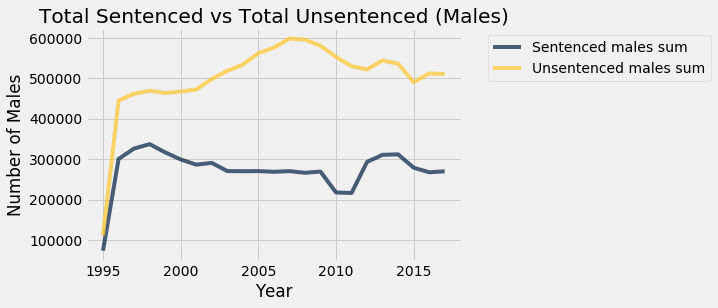

In [25]:
males.plot("Year")
plt.title("Total Sentenced vs Total Unsentenced (Males)")
plt.xlabel("Year")
plt.ylabel("Number of Males")

We have found and plotted the counts of males but let's try finding the percentage of males from the total ADP count. Start by getting the sum of the sentenced males column, the sum of the unsentenced males column, and then dividing both of these columns by the total ADP (see if you can use a variable from earlier on in our analysis!)

In [26]:
# percent male
male_sent = males.column("Sentenced males sum")
male_unsent = males.column("Unsentenced males sum")

m_sent_percent = male_sent / total_adp * 100
m_unsent_percent = male_unsent / total_adp * 100

Let's add these new percentage columns to our Male table (since they represent the males), and then select the relevant columns that we are going to plot.

In [27]:
males = males.with_column("Total Male Sentenced Percent", m_sent_percent)
males = males.with_column("Total Male Unsentenced Percent", m_unsent_percent)

m_percent_totals = males.select("Year", "Total Male Sentenced Percent", "Total Male Unsentenced Percent")
m_percent_totals


Year,Total Male Sentenced Percent,Total Male Unsentenced Percent
1995,35.099,53.2016
1996,35.5328,52.6346
1997,36.0723,51.0544
1998,36.1894,50.3593
1999,35.2584,51.611
2000,33.9134,52.9598
2001,32.9984,54.4064
2002,32.2428,55.249
2003,29.9154,57.3349
2004,29.2501,57.828


Now let us plot the percentage of males who were sentenced vs the percentage of males who were unsentenced.

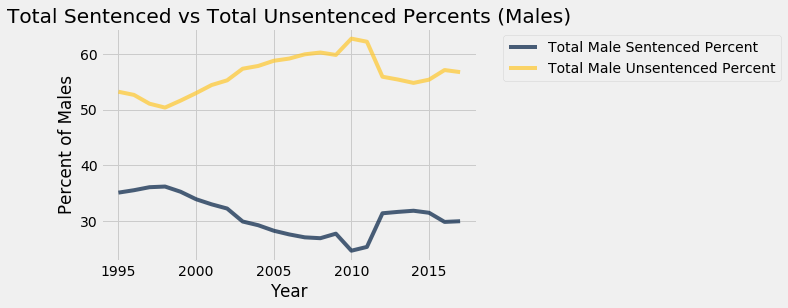

In [28]:
m_percent_totals.plot("Year")
plt.title("Total Sentenced vs Total Unsentenced Percents (Males)")
plt.xlabel("Year")
plt.ylabel("Percent of Males")

Let's try plotting dots so we can see what happened at specific years in the jails related to the males. Due to realignment, the years of 2011, 2013, and 2014 were significant. Let's see how these specific years play out on our plot above by plotting red dots representing those years.

First, let's start off by getting the data at the years 2011, 2013, and 2014. Remember, we use the `where()` function.

In [29]:
data2011 = m_percent_totals.where("Year", 2011)
data2013 = m_percent_totals.where("Year", 2013)
data2014 = m_percent_totals.where("Year", 2014)

Next, we want to get the x and y coordinates of each point using the data we just found. For example, using data2011, can now assign x_2011 to the year column and the y_2011 to the Percent column.

In [30]:
x_2011 = data2011.column('Year')
y_2011 = data2011.column("Total Male Sentenced Percent")

x_2013 = data2013.column('Year')
y_2013 = data2013.column("Total Male Sentenced Percent")

x_2014 = data2014.column('Year')
y_2014 = data2014.column("Total Male Sentenced Percent")

x_2011_un = data2011.column('Year')
y_2011_un = data2011.column("Total Male Unsentenced Percent")

x_2013_un = data2013.column('Year')
y_2013_un = data2013.column("Total Male Unsentenced Percent")

x_2014_un = data2014.column('Year')
y_2014_un = data2014.column("Total Male Unsentenced Percent")

We can now add our points to our plot.


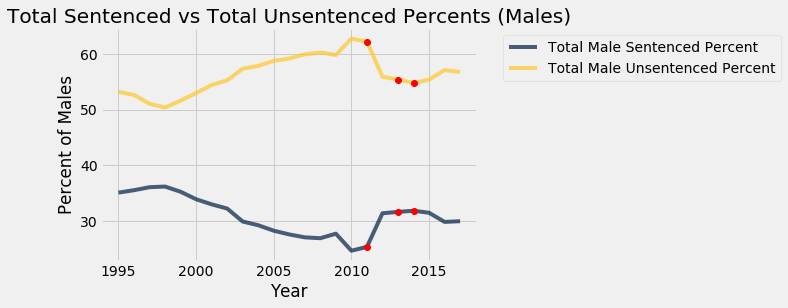

In [31]:
m_percent_totals.plot("Year")
plt.title("Total Sentenced vs Total Unsentenced Percents (Males)")
plt.xlabel("Year")
plt.ylabel("Percent of Males")

plt.plot(x_2011, y_2011, 'ro')
plt.plot(x_2013, y_2013, 'ro')
plt.plot(x_2014, y_2014, 'ro')
plt.plot(x_2011_un, y_2011_un, 'ro')
plt.plot(x_2013_un, y_2013_un, 'ro')
plt.plot(x_2014_un, y_2014_un, 'ro')

Look at the two plots that you made specifically for males. What patterns do you notice? Is there anything interesting you notice related to the years/points we plotted?

YOUR RESPONSE HERE

### 3.2 Females: Sentenced vs. Unsentenced


Above we analyzed just the males that were sentenced and unsentenced. Now let us do the same with females. Let's start off by creating a females variable that will contain the relevant female columns from the original `data_year` table we had earlier. 

In [32]:
females = data_year.select("Year", "Sentenced females sum", "Unsentenced females sum")
females

Year,Sentenced females sum,Unsentenced females sum
1995,11201.6,13430.4
1996,44444.9,55555.7
1997,52028.7,64381.5
1998,58904.8,66372.2
1999,54883.7,63054.8
2000,50571,65222.3
2001,46506.9,62783.5
2002,45880.4,66905
2003,43519,71714
2004,44329,74979


Using `females` table, we can plot the number of females sentenced and the number of females who were unsentenced over the years. 

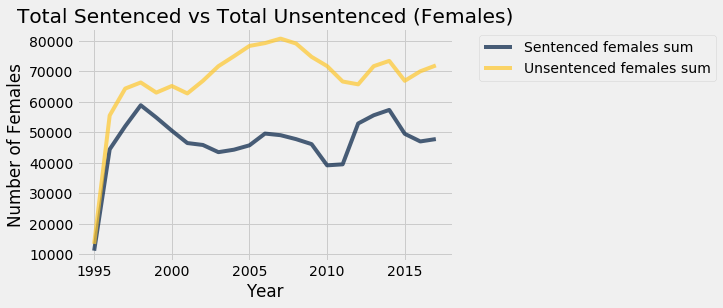

In [33]:
females.plot("Year")
plt.title("Total Sentenced vs Total Unsentenced (Females)")
plt.xlabel("Year")
plt.ylabel("Number of Females")

What do you notice about this plot compared to the related males plot?

YOUR RESPONSE HERE

Similarly, we can calculate the percentages of sentenced females and unsentenced females and plot this relationship. First, get the sentenced females sum and unsentenced females sum columns, and then divide by the total ADP in order to get a percentage.

In [34]:
# percent female
female_sent = females.column("Sentenced females sum")
female_unsent = females.column("Unsentenced females sum")

f_sent_percent = female_sent / total_adp * 100
f_unsent_percent = female_unsent / total_adp * 100

We have our percentages for our females, so first let us add it to our `females` table for reference. We can then select the relevant columns we want to plot and use now. 

In [35]:
females = females.with_column("Total Female Sentenced Percent", f_sent_percent)
females = females.with_column("Total Female Unsentenced Percent", f_unsent_percent)

f_percent_totals = females.select("Year", "Total Female Sentenced Percent", "Total Female Unsentenced Percent")
f_percent_totals

Year,Total Female Sentenced Percent,Total Female Unsentenced Percent
1995,5.35384,6.4191
1996,5.25896,6.57364
1997,5.75361,7.11964
1998,6.32477,7.12656
1999,6.11041,7.02014
2000,5.73295,7.39388
2001,5.35973,7.23554
2002,5.08828,7.41998
2003,4.81506,7.93463
2004,4.80112,8.12072


Using these three columns, try plotting the percentages for females. What do you notice about this plot? How is it different or similar to the one you plotted for the males?

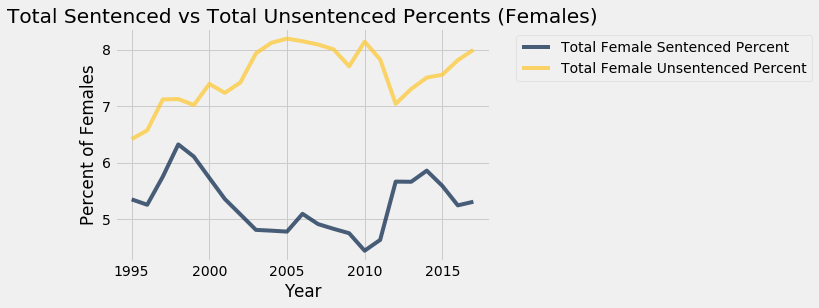

In [36]:
f_percent_totals.plot("Year")
plt.title("Total Sentenced vs Total Unsentenced Percents (Females)")
plt.xlabel("Year")
plt.ylabel("Percent of Females")

Let's try plotting dots so we can see what happened at specific years in the jails related to the females. Due to realignment, the years of 2011, 2013, and 2014 were significant. Let's see how these specific years play out on our plot above by plotting red dots representing those years.

First, let's start off by getting the data at the years 2011, 2013, and 2014. Remember, we use the `where()` function.

In [37]:
data2011 = f_percent_totals.where("Year", 2011)
data2013 = f_percent_totals.where("Year", 2013)
data2014 = f_percent_totals.where("Year", 2014)

Next, we want to get the x and y coordinates of each point using the data we just found. For example, using data2011, can now assign x_2011 to the year column and the y_2011 to the Percent column.

In [38]:
x_2011 = data2011.column('Year')
y_2011 = data2011.column("Total Female Sentenced Percent")

x_2013 = data2013.column('Year')
y_2013 = data2013.column("Total Female Sentenced Percent")

x_2014 = data2014.column('Year')
y_2014 = data2014.column("Total Female Sentenced Percent")

x_2011_un = data2011.column('Year')
y_2011_un = data2011.column("Total Female Unsentenced Percent")

x_2013_un = data2013.column('Year')
y_2013_un = data2013.column("Total Female Unsentenced Percent")

x_2014_un = data2014.column('Year')
y_2014_un = data2014.column("Total Female Unsentenced Percent")

We can now add our points to our plot.


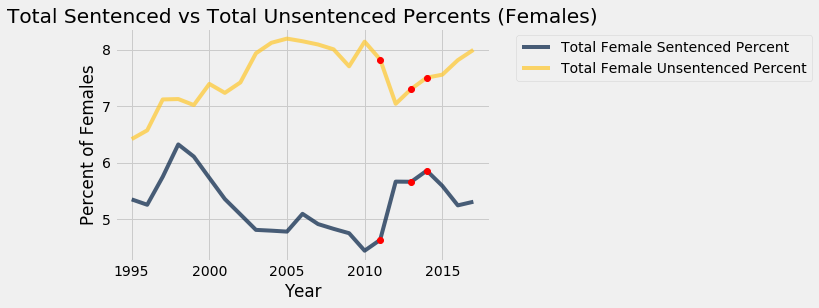

In [39]:
f_percent_totals.plot("Year")
plt.title("Total Sentenced vs Total Unsentenced Percents (Females)")
plt.xlabel("Year")
plt.ylabel("Percent of Females")

plt.plot(x_2011, y_2011, 'ro')
plt.plot(x_2013, y_2013, 'ro')
plt.plot(x_2014, y_2014, 'ro')
plt.plot(x_2011_un, y_2011_un, 'ro')
plt.plot(x_2013_un, y_2013_un, 'ro')
plt.plot(x_2014_un, y_2014_un, 'ro')

---
# Final Survey <a id='section3'></a>

Congrats! You've finished the final Jupyter Notebook assignment! The Division of Data Sciences and Information would like to ask you to please fill this survey out as a part of your assignment. We would like to improve the module for future semesters, and would really appreciate it if you took the time to fill this out so we can better serve you!

Please make sure you are logged into your Berkeley (.edu) email address to access the form.

[Survey Link](https://goo.gl/forms/kHj3jQapNwP4l5Mf2)

Alternatively, please copy and paste this link into your URL bar: https://goo.gl/forms/kHj3jQapNwP4l5Mf2

---

## Saving the Notebook as an PDF

Congrats on finishing this notebook! As before, you will be submitting this notebook as an PDF file. To turn in this assignment follow the steps below:

1. **Important:** Click the Save icon located at the far left on the top toolbar. Make sure to do this before following the next steps.
2. Save the webpage as a PDF.
    * For Chrome users:
        1. Click on the rightmost button on the top toolbar
        2. In the drop down, click "Print"
        3. For "Destination", choose "Save as PDF"
    * For Firefox users:
        1. Click on the rightmost button on the top toolbar
        2. In the drop down, click "Print"
        3. Click Print and set the destination as "Adobe PDF" or "Microsoft Print to PDF"
5. Once the file downloads, open it using a PDF reader to make sure that everything looks okay.
6. If any pages are omitted from the output PDF, make sure that the images that you have uploaded to Jupyter are displaying properly in the notebook and that the correct filenames are specified. **Issues in converting the notebook to PDF format usually happen when an image in the notebook is not displayed/embedded properly.**
7. Submit to the Problem Set 3 Assignment on bCourses.

---

---
Notebook developed by: Ashley Quiterio and  Shalini Kunapuli

Data Science Modules: http://data.berkeley.edu/education/modules

